<a href="https://colab.research.google.com/github/mcramireza1/Grupo7_Metodos2/blob/main/Copia_de_T1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

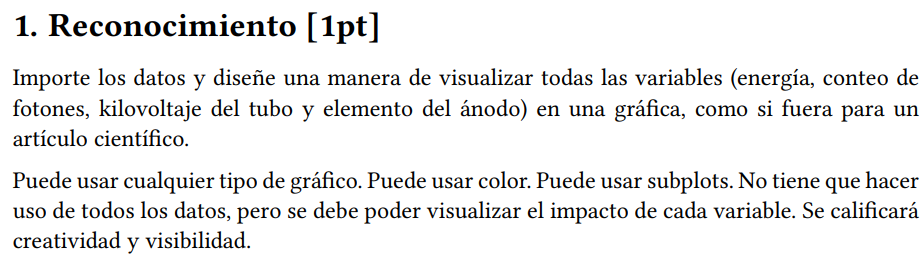

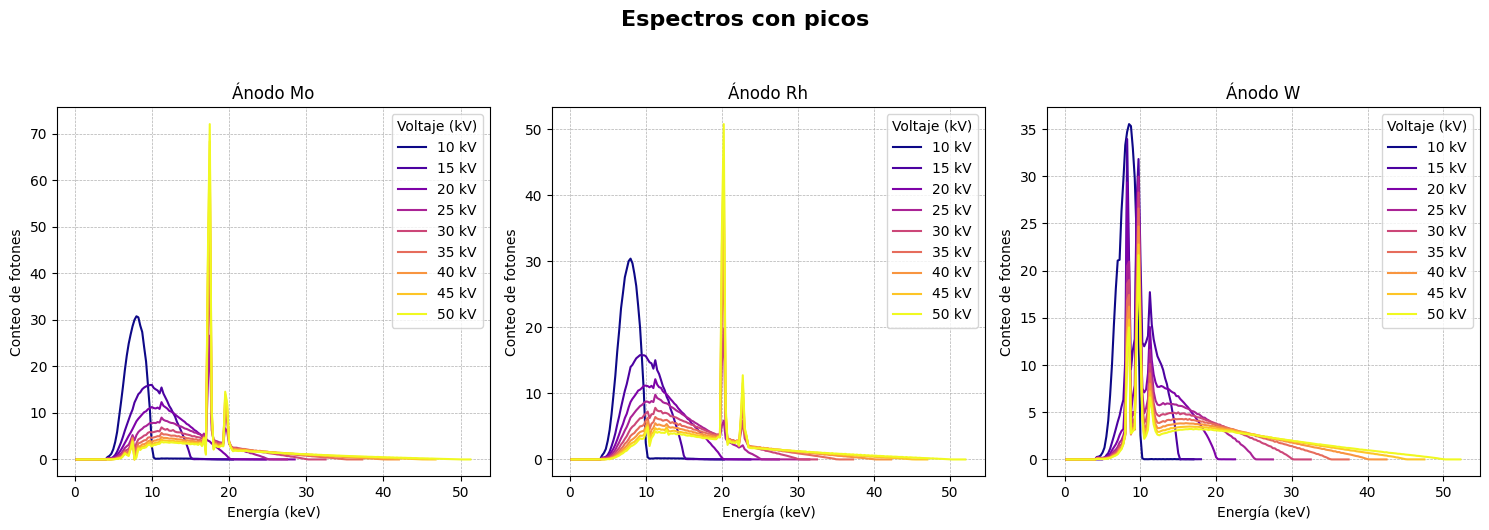

In [47]:
import os
import glob
import re
import numpy as np
import matplotlib.pyplot as plt
import zipfile

zip_path = "mammography_spectra (1).zip"
extract_path = "mammography_spectra"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

#Variables: energía, conteo de fotones, kilovoltaje del tubo y elemento del ánodos
def Extraer_params(elemento):
    carpeta = os.path.join(extract_path, f"{elemento}_unfiltered_10kV-50kV")
    archivos_filtrados = glob.glob(os.path.join(carpeta, "**", "*.dat"), recursive=True)
    espectros = []

    for archivo in archivos_filtrados:
      nombre = os.path.basename(archivo)
      if "sin_picos" in nombre:
        continue
      match = re.search(r"(\d+)kV", nombre)
      if not match:
          continue
      kv = int(match.group(1))
      if not kv%5==0:
          continue
      datos = np.loadtxt(archivo, dtype=float, comments="#", encoding="latin1")
      espectros.append((kv, datos[:,0], datos[:,1]))
    return sorted(espectros, key=lambda x: x[0])

#Gráfica
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
colores = plt.cm.plasma(np.linspace(0, 1, 9))

for ax, elemento in zip(axs, ["Mo", "Rh", "W"]):
    espectros = Extraer_params(elemento)
    for color, (kv, energia, fotones) in zip(colores, espectros):
        ax.plot(energia, fotones, color=color, label=f"{kv} kV", linewidth=1.5 )
    ax.set_title(f"Ánodo {elemento}")
    plt.suptitle("Espectros con picos", y=1.05, fontsize=16, fontweight="bold")
    ax.set_xlabel("Energía (keV)")
    ax.set_ylabel("Conteo de fotones")
    ax.grid(True, ls="--", lw=0.5)
    ax.legend(title="Voltaje (kV)", loc="upper right")
plt.tight_layout()
plt.savefig("1.pdf", bbox_inches="tight", pad_inches=0.1)
plt.show()

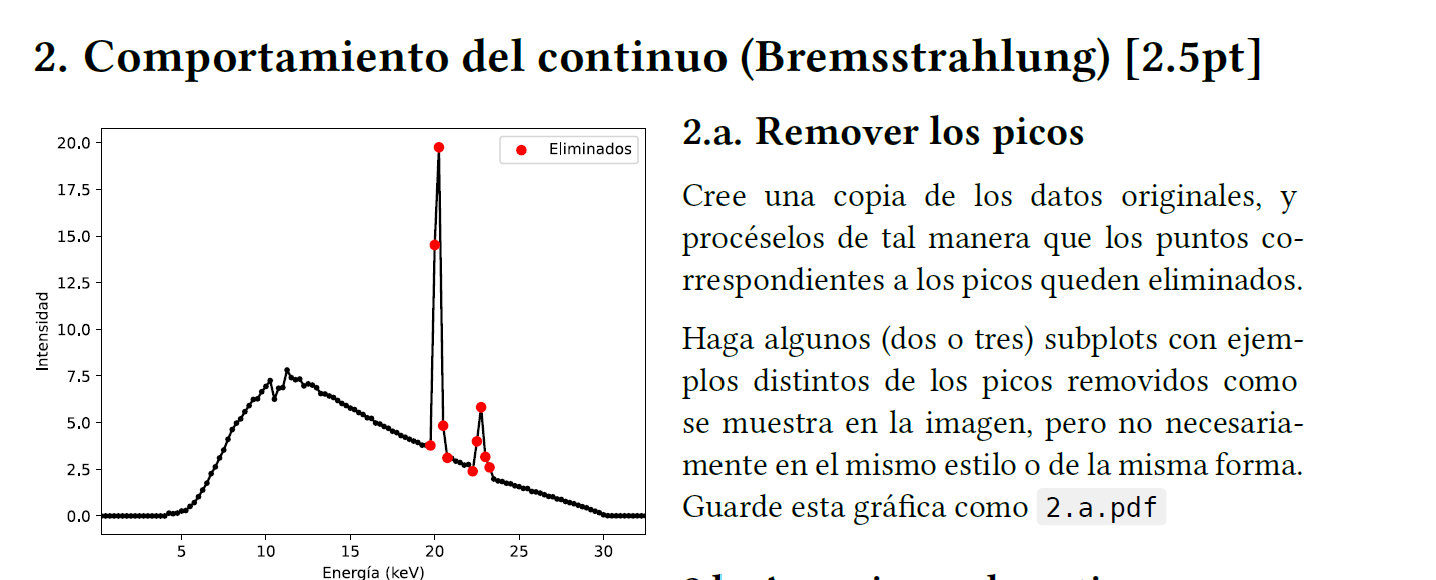


[Mo] Procesado: mammography_spectra/Mo_unfiltered_10kV-50kV/Mo_48kV.dat_sin_picos.dat → mammography_spectra/Mo_unfiltered_10kV-50kV/Mo_48kV.dat_sin_picos.dat_sin_picos.dat
[Mo] Procesado: mammography_spectra/Mo_unfiltered_10kV-50kV/Mo_36kV.dat_sin_picos.dat → mammography_spectra/Mo_unfiltered_10kV-50kV/Mo_36kV.dat_sin_picos.dat_sin_picos.dat
[Mo] Procesado: mammography_spectra/Mo_unfiltered_10kV-50kV/Mo_24kV.dat_sin_picos.dat_sin_picos.dat → mammography_spectra/Mo_unfiltered_10kV-50kV/Mo_24kV.dat_sin_picos.dat_sin_picos.dat_sin_picos.dat
[Mo] Procesado: mammography_spectra/Mo_unfiltered_10kV-50kV/Mo_10kV.dat → mammography_spectra/Mo_unfiltered_10kV-50kV/Mo_10kV.dat_sin_picos.dat
[Mo] Procesado: mammography_spectra/Mo_unfiltered_10kV-50kV/Mo_14kV.dat_sin_picos.dat_sin_picos.dat → mammography_spectra/Mo_unfiltered_10kV-50kV/Mo_14kV.dat_sin_picos.dat_sin_picos.dat_sin_picos.dat
[Mo] Procesado: mammography_spectra/Mo_unfiltered_10kV-50kV/Mo_33kV.dat → mammography_spectra/Mo_unfiltered_10kV

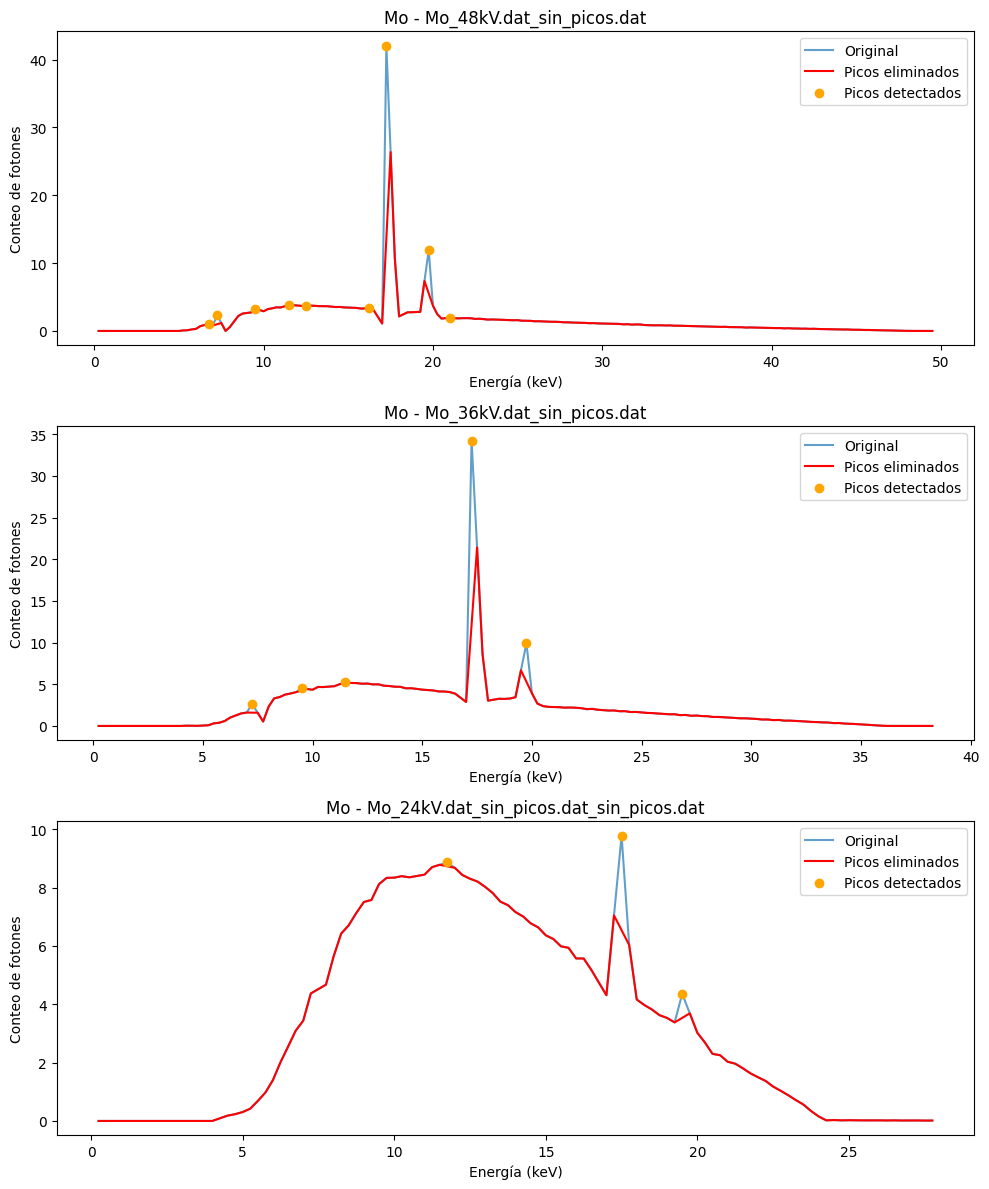

[Rh] Procesado: mammography_spectra/Rh_unfiltered_10kV-50kV/Rh_22kV.dat → mammography_spectra/Rh_unfiltered_10kV-50kV/Rh_22kV.dat_sin_picos.dat
[Rh] Procesado: mammography_spectra/Rh_unfiltered_10kV-50kV/Rh_45kV.dat_sin_picos.dat → mammography_spectra/Rh_unfiltered_10kV-50kV/Rh_45kV.dat_sin_picos.dat_sin_picos.dat
[Rh] Procesado: mammography_spectra/Rh_unfiltered_10kV-50kV/Rh_11kV.dat_sin_picos.dat → mammography_spectra/Rh_unfiltered_10kV-50kV/Rh_11kV.dat_sin_picos.dat_sin_picos.dat
[Rh] Procesado: mammography_spectra/Rh_unfiltered_10kV-50kV/Rh_29kV.dat_sin_picos.dat_sin_picos.dat → mammography_spectra/Rh_unfiltered_10kV-50kV/Rh_29kV.dat_sin_picos.dat_sin_picos.dat_sin_picos.dat
[Rh] Procesado: mammography_spectra/Rh_unfiltered_10kV-50kV/Rh_27kV.dat_sin_picos.dat_sin_picos.dat → mammography_spectra/Rh_unfiltered_10kV-50kV/Rh_27kV.dat_sin_picos.dat_sin_picos.dat_sin_picos.dat
[Rh] Procesado: mammography_spectra/Rh_unfiltered_10kV-50kV/Rh_27kV.dat_sin_picos.dat → mammography_spectra/Rh_u

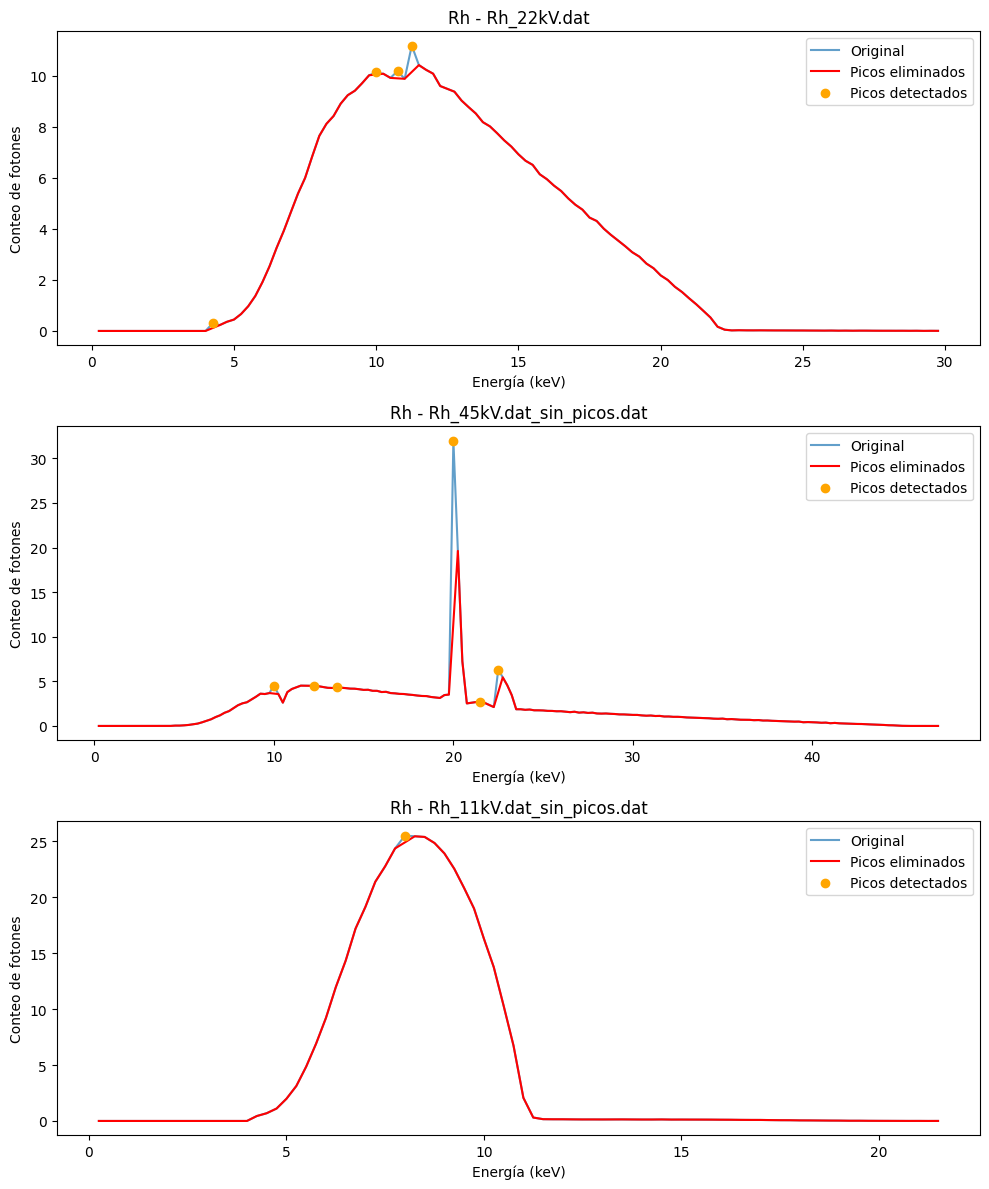

[W] Procesado: mammography_spectra/W_unfiltered_10kV-50kV/W_18kV.dat_sin_picos.dat → mammography_spectra/W_unfiltered_10kV-50kV/W_18kV.dat_sin_picos.dat_sin_picos.dat
[W] Procesado: mammography_spectra/W_unfiltered_10kV-50kV/W_49kV.dat → mammography_spectra/W_unfiltered_10kV-50kV/W_49kV.dat_sin_picos.dat
[W] Procesado: mammography_spectra/W_unfiltered_10kV-50kV/W_17kV.dat_sin_picos.dat_sin_picos.dat → mammography_spectra/W_unfiltered_10kV-50kV/W_17kV.dat_sin_picos.dat_sin_picos.dat_sin_picos.dat
[W] Procesado: mammography_spectra/W_unfiltered_10kV-50kV/W_20kV.dat_sin_picos.dat_sin_picos.dat → mammography_spectra/W_unfiltered_10kV-50kV/W_20kV.dat_sin_picos.dat_sin_picos.dat_sin_picos.dat
[W] Procesado: mammography_spectra/W_unfiltered_10kV-50kV/W_17kV.dat_sin_picos.dat → mammography_spectra/W_unfiltered_10kV-50kV/W_17kV.dat_sin_picos.dat_sin_picos.dat
[W] Procesado: mammography_spectra/W_unfiltered_10kV-50kV/W_29kV.dat_sin_picos.dat_sin_picos.dat → mammography_spectra/W_unfiltered_10kV-

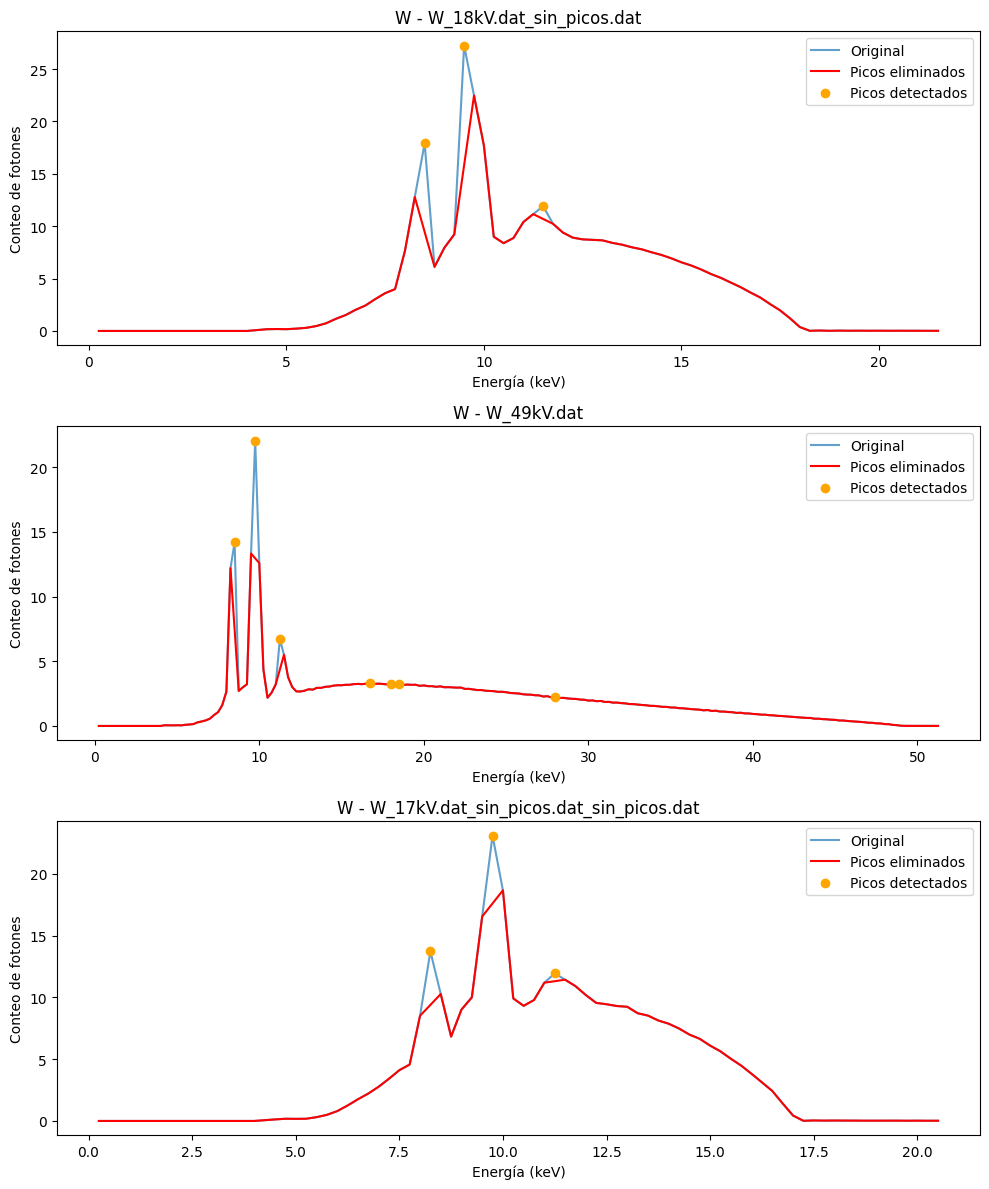

<Figure size 640x480 with 0 Axes>

In [48]:
#2.a Remover picos
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import zipfile

#Extraer .zip
zip_path = "mammography_spectra (1).zip"
extract_path = "mammography_spectra"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
#Función de procesamiento
def procesar_elemento(nombre_elemento):
    carpeta_elemento = os.path.join(extract_path, f"{nombre_elemento}_unfiltered_10kV-50kV")
    ejemplos_graficos = []

    if not os.path.isdir(carpeta_elemento):
        print(f"No se encontró carpeta para {nombre_elemento}")
        return

    for archivo in glob.glob(os.path.join(carpeta_elemento, "*")):
        try:
            # Intentar cargar ignorando caracteres no UTF-8 y saltando encabezado si es necesario
            with open(archivo, "r", encoding="latin1", errors="ignore") as f:
                lineas = [line.strip() for line in f if line.strip()]


            datos = []
            for linea in lineas:
                partes = linea.split()
                if len(partes) >= 2:
                    try:
                        datos.append([float(partes[0]), float(partes[1])])
                    except ValueError:
                        pass

            datos = np.array(datos)
            if datos.shape[0] == 0:
                continue

            x = datos[:, 0]
            y = datos[:, 1]
            y_filtrado = np.copy(y)

            #Find Peacks
            picos, _ = find_peaks(y, prominence=0.05)


            for idx in picos:
                if 0 < idx < len(y) - 1:
                    y_filtrado[idx] = (y_filtrado[idx - 1] + y_filtrado[idx + 1]) / 2


            salida = archivo + "_sin_picos.dat"
            np.savetxt(salida, np.column_stack((x, y_filtrado)), delimiter="\t")


            if len(ejemplos_graficos) < 3:
                ejemplos_graficos.append((x, y, y_filtrado, picos, os.path.basename(archivo)))

            print(f"[{nombre_elemento}] Procesado: {archivo} → {salida}")

        except Exception as e:
            print(f"[{nombre_elemento}] No se pudo procesar {archivo}: {e}")

    #Plotear
    if ejemplos_graficos:
        fig, axs = plt.subplots(len(ejemplos_graficos), 1, figsize=(10, 4 * len(ejemplos_graficos)))
        if len(ejemplos_graficos) == 1:
            axs = [axs]

        for ax, (x, y, y_filtrado, picos, nombre) in zip(axs, ejemplos_graficos):
            ax.plot(x, y, label="Original", alpha=0.7)
            ax.plot(x, y_filtrado, label="Picos eliminados", color="red")
            ax.scatter(x[picos], y[picos], color="orange", label="Picos detectados", zorder=3)
            ax.set_title(f"{nombre_elemento} - {nombre}")
            ax.set_xlabel("Energía (keV)")
            ax.set_ylabel("Conteo de fotones")
            ax.legend()

        plt.tight_layout()
        plt.show()

#Para cada conjunto de datos
procesar_elemento("Mo")
procesar_elemento("Rh")
procesar_elemento("W")
plt.savefig("2.a.pdf")

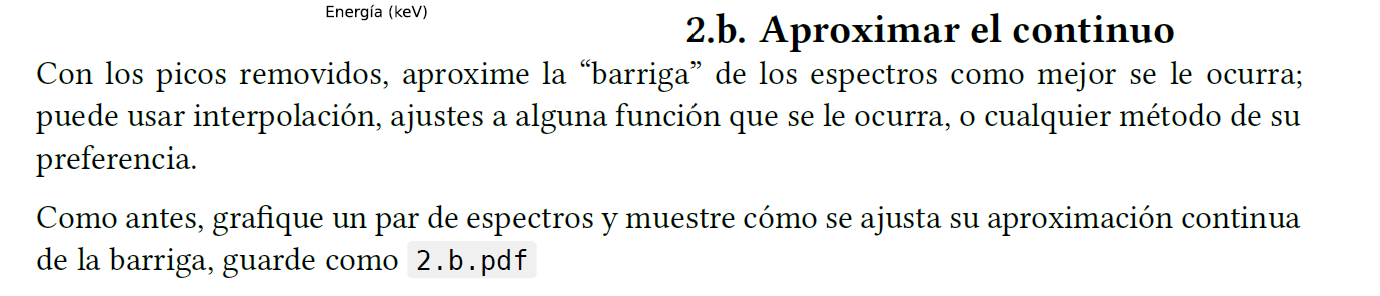


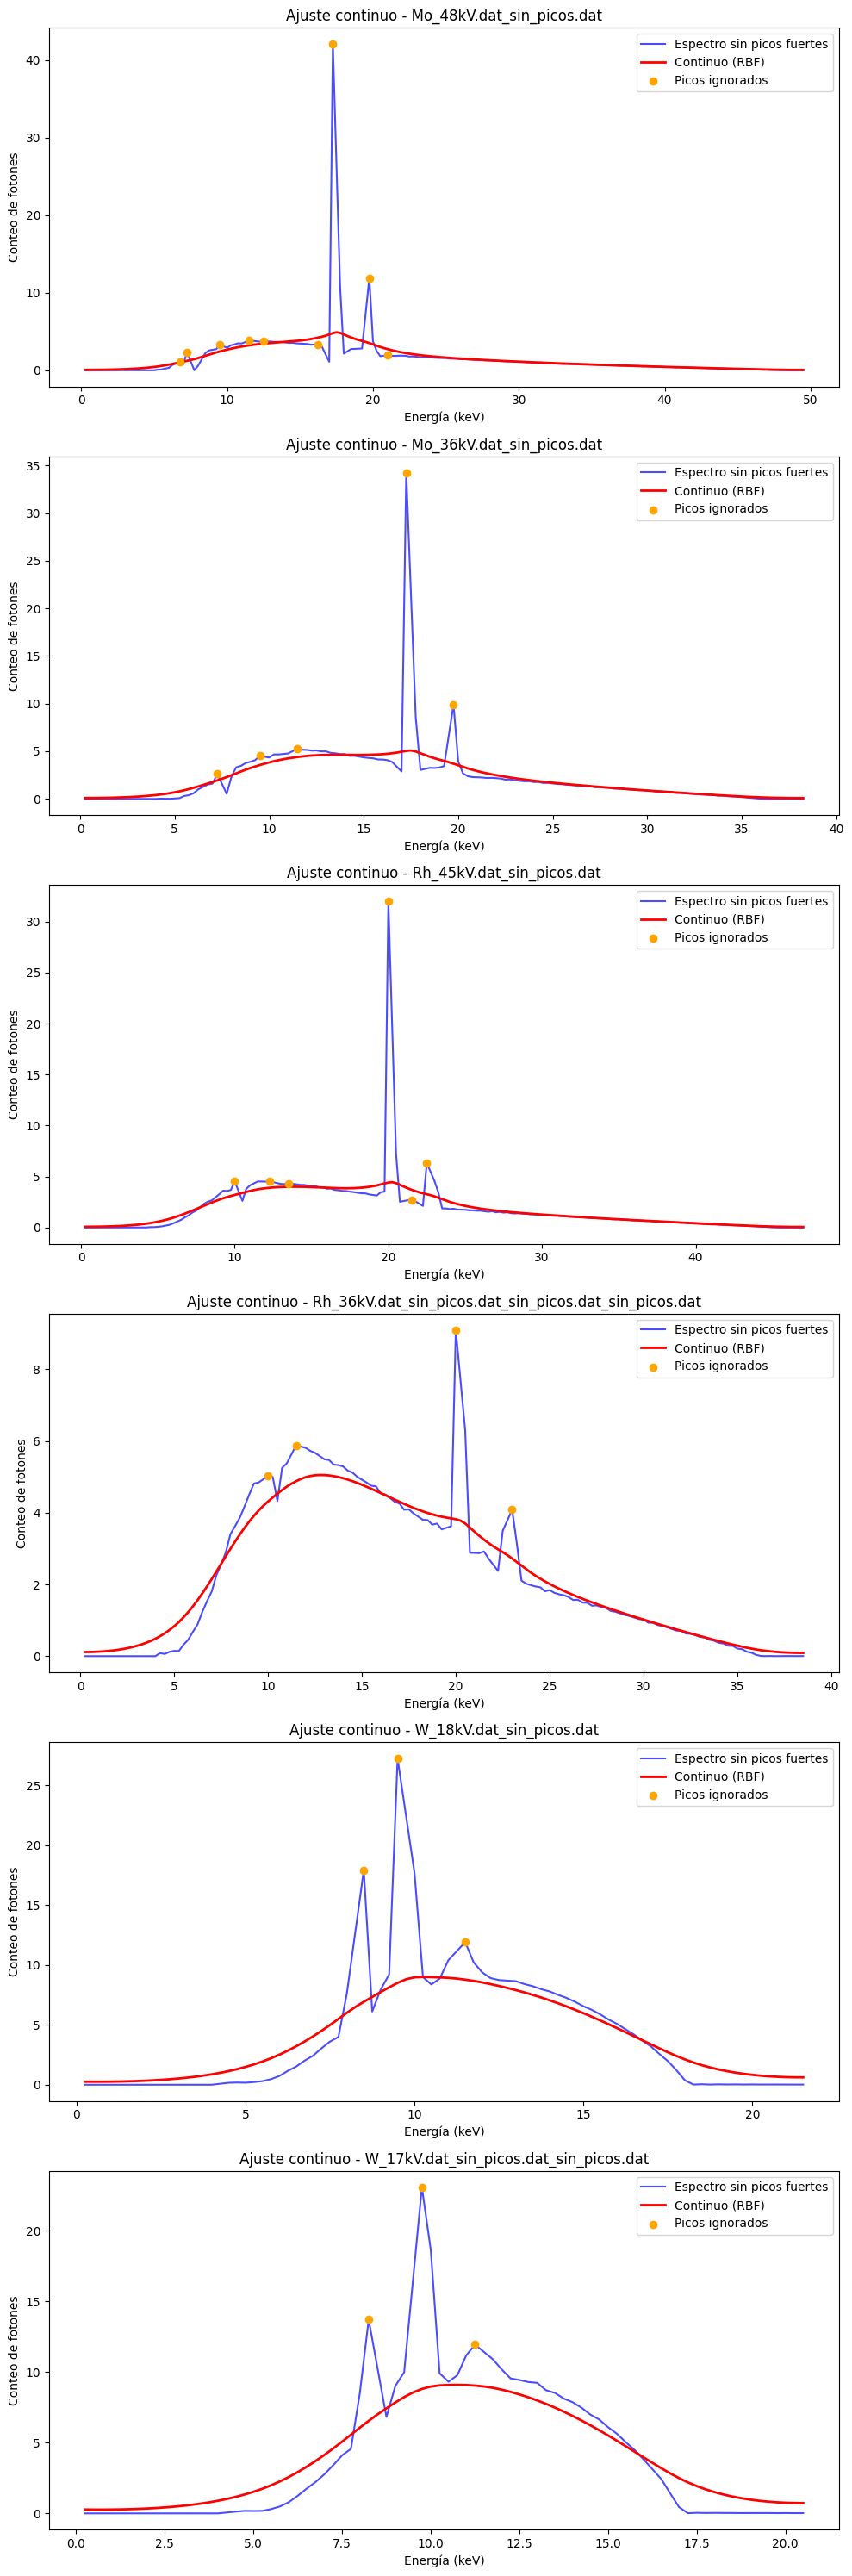

Gráfica guardada como 2.b_.pdf


In [49]:
#2b
from scipy.signal import find_peaks
from scipy.interpolate import Rbf
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

def ajustar_continuo(x, y, prominencia=0.05, funcion="multiquadric", suavizado=100):
    picos, _ = find_peaks(y, prominence=prominencia)

    mascara = np.ones_like(y, dtype=bool)
    mascara[picos] = False

    rbf = Rbf(x[mascara], y[mascara], function=funcion, smooth=suavizado)
    y_continuo = rbf(x)

    return y_continuo, rbf, picos

carpeta = "mammography_spectra"
archivos_filtrados = glob.glob(
    os.path.join(carpeta, "**", "*_sin_picos.dat"),
    recursive=True
)

if not archivos_filtrados:
    raise FileNotFoundError("No se encontraron archivos '_sin_picos.dat'.")

archivos_mo = [f for f in archivos_filtrados if "/Mo_" in f or "\\Mo_" in f]
archivos_rh = [f for f in archivos_filtrados if "/Rh_" in f or "\\Rh_" in f]
archivos_w  = [f for f in archivos_filtrados if "/W_"  in f or "\\W_" in f]
ejemplos = archivos_mo[:2] + archivos_rh[:2] + archivos_w[:2]

fig, axs = plt.subplots(len(ejemplos), 1, figsize=(10, 5 * len(ejemplos)))
if len(ejemplos) == 1:
    axs = [axs]

for ax, archivo in zip(axs, ejemplos):
    datos = np.loadtxt(archivo)
    x = datos[:, 0]
    y = datos[:, 1]

    # Ajustar continuo ignorando picos
    y_continuo, rbf_model, picos = ajustar_continuo(x, y, prominencia=0.05)

    # Graficar
    ax.plot(x, y, label="Espectro sin picos fuertes", color="blue", alpha=0.7)
    ax.plot(x, y_continuo, label="Continuo (RBF)", color="red", linewidth=2)
    ax.scatter(x[picos], y[picos], color="orange", label="Picos ignorados", zorder=3)
    ax.set_title(f"Ajuste continuo - {os.path.basename(archivo)}")
    ax.set_xlabel("Energía (keV)")
    ax.set_ylabel("Conteo de fotones")
    ax.legend()

plt.tight_layout()
plt.savefig("2.b_.pdf")
plt.show()
print("Gráfica guardada como 2.b_.pdf")

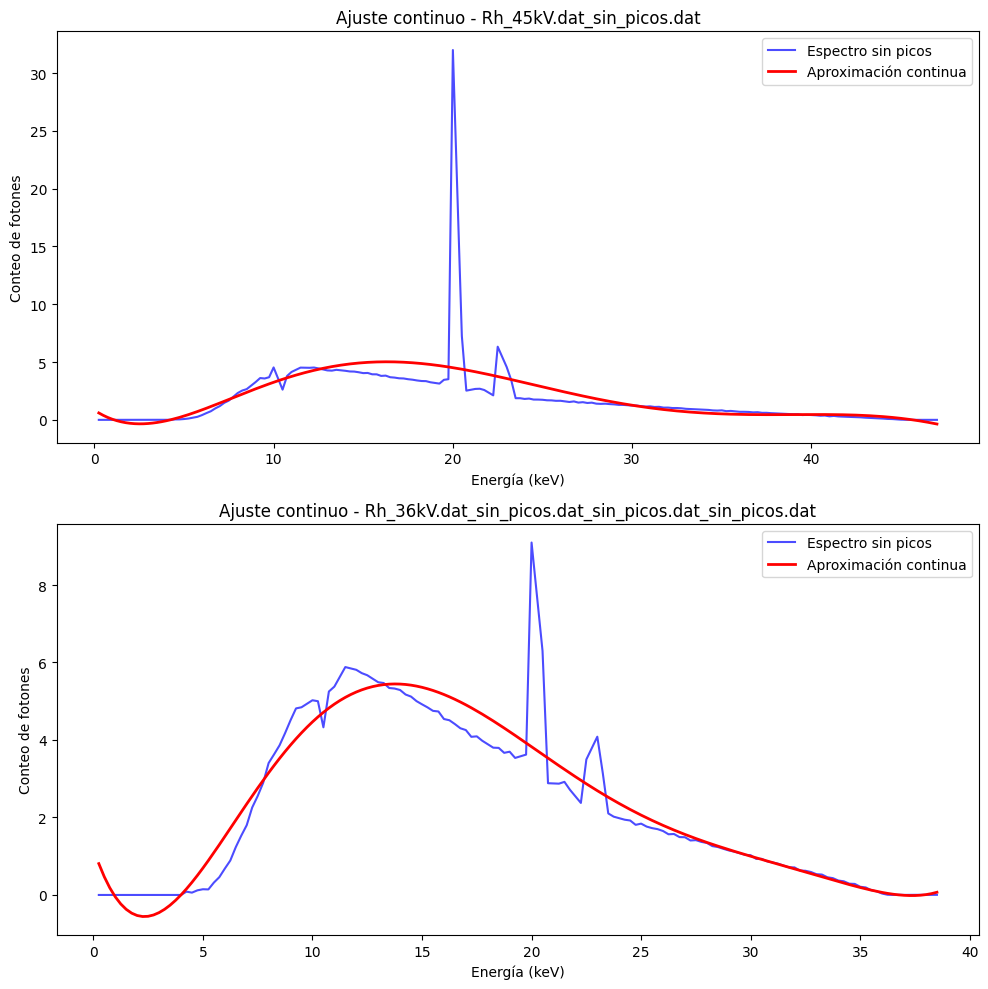

Archivo guardado como 2.b.pdf


In [50]:

#2.b
#Función de ajuste polinomial
def ajustar_continuo(x, y, grado=10):

    coef = np.polyfit(x, y, grado)
    polinomio = np.poly1d(coef)
    return polinomio(x), polinomio


carpeta = "mammography_spectra"
archivos_filtrados = glob.glob(os.path.join(carpeta, "**", "*_sin_picos.dat"), recursive=True)

ejemplos = archivos_filtrados[:2]

fig, axs = plt.subplots(len(ejemplos), 1, figsize=(10, 5 * len(ejemplos)))

if len(ejemplos) == 1:
    axs = [axs]

for ax, archivo in zip(axs, ejemplos):
    datos = np.loadtxt(archivo)
    x = datos[:, 0]
    y = datos[:, 1]

    # Ajustar continuo
    y_continuo, polinomio = ajustar_continuo(x, y, grado=6)

    #Plotear
    ax.plot(x, y, label="Espectro sin picos", color="blue", alpha=0.7)
    ax.plot(x, y_continuo, label="Aproximación continua", color="red", linewidth=2)
    ax.set_title(f"Ajuste continuo - {os.path.basename(archivo)}")
    ax.set_xlabel("Energía (keV)")
    ax.set_ylabel("Conteo de fotones")
    ax.legend()

plt.tight_layout()
plt.savefig("2.b.pdf")
plt.show()

print("Archivo guardado como 2.b.pdf")


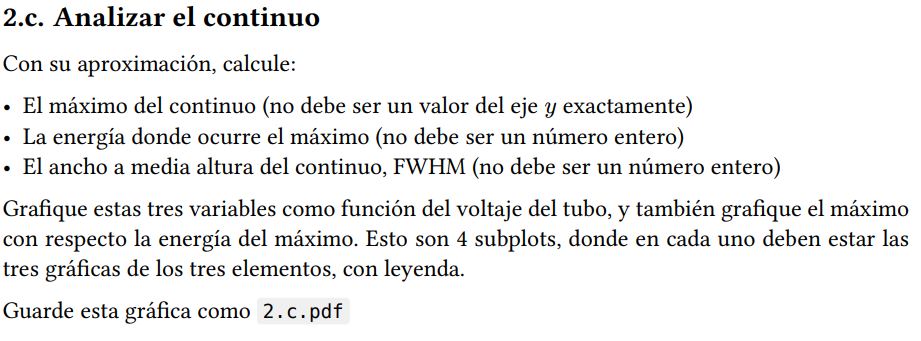

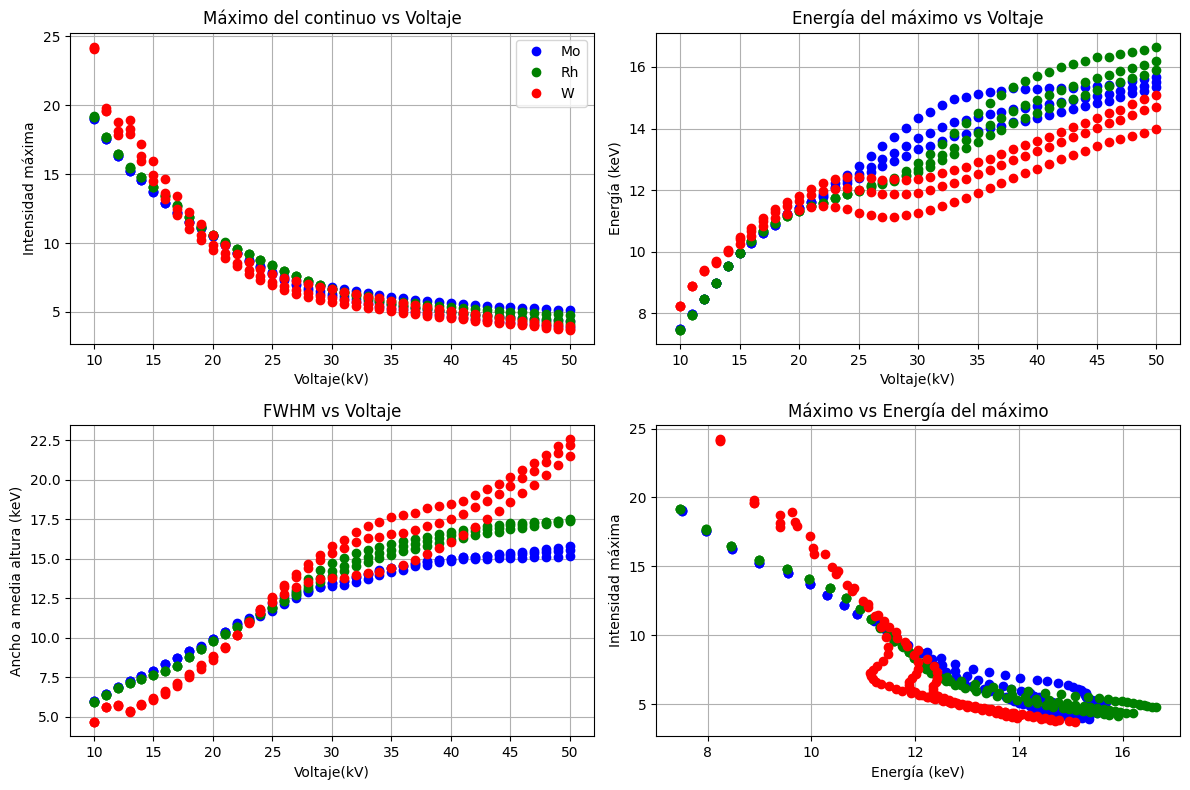

Gráfica guardada como 2.c.pdf


In [51]:
#2.c Máximo y mínimo continuo
#Ancho de la media altura donde ocurre el máximo
def FWHM(x_ajustada, y_ajustada):
    mitad = np.max(y_ajustada) / 2
    indices = np.where(y_ajustada >= mitad)[0]
    if len(indices) < 2:
        return np.nan
    return x_ajustada[indices[-1]] - x_ajustada[indices[0]]


elementos = ["Mo", "Rh", "W"]
espectros = {elemento: {"kv": [], "max": [], "emax": [], "fwhm": []} for elemento in elementos}

for archivo in archivos_filtrados:
    nombre = os.path.basename(archivo)
    elem = next((el for el in elementos if el  in nombre), None)
    if elem is None:
        continue
    try:
        kV = int(nombre.split("kV")[0].split("_")[-1])
    except:
        continue

    datos = np.loadtxt(archivo, encoding='latin1')
    x, y = datos[:, 0], datos[:, 1]
    y_continuo, polinomio = ajustar_continuo(x, y, grado=6)

    x_ajustada = np.linspace(x.min(), x.max(), 5000)
    y_ajustada = polinomio(x_ajustada)

    i_max = np.argmax(y_ajustada)
    max_x = x_ajustada[i_max]
    max_y = y_ajustada[i_max]
    fwhm = FWHM(x_ajustada, y_ajustada)

#Párametros
    espectros[elem]["kv"].append(kV)
    espectros[elem]["max"].append(max_y)
    espectros[elem]["emax"].append(max_x)
    espectros[elem]["fwhm"].append(fwhm)

# Gráfica
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
colores = {"Mo": "b", "Rh": "g", "W": "r"}

#4 subplots
for elemento in elementos:
    axs[0,0].plot( espectros[elemento]["kv"],  espectros[elemento]["max"], 'o', color=colores[elemento], label=elemento)
axs[0,0].set_title("Máximo del continuo vs Voltaje")
axs[0,0].set_xlabel("Voltaje(kV)")
axs[0,0].set_ylabel("Intensidad máxima")
axs[0,0].legend()
axs[0,0].grid(True)

for elemento in elementos:
    axs[0,1].plot(espectros[elemento]["kv"], espectros[elemento]["emax"], 'o', color=colores[elemento], label=elemento)
axs[0,1].set_title("Energía del máximo vs Voltaje")
axs[0,1].set_xlabel("Voltaje(kV)")
axs[0,1].set_ylabel("Energía (keV)")
axs[0,1].grid(True)

for elemento in elementos:
    axs[1,0].plot( espectros[elemento]["kv"], espectros[elemento]["fwhm"], 'o', color=colores[elemento], label=elemento)
axs[1,0].set_title("FWHM vs Voltaje")
axs[1,0].set_xlabel("Voltaje(kV)")
axs[1,0].set_ylabel("Ancho a media altura (keV)")
axs[1,0].grid(True)

for elemento in elementos:
    axs[1,1].plot(espectros[elemento]["emax"], espectros[elemento]["max"], 'o', color=colores[elemento], label=elemento)
axs[1,1].set_title("Máximo vs Energía del máximo")
axs[1,1].set_xlabel("Energía (keV)")
axs[1,1].set_ylabel("Intensidad máxima")
axs[1,1].grid(True)

plt.tight_layout()
plt.savefig("2.c.pdf", bbox_inches="tight", pad_inches=0.1)
plt.show()
print("Gráfica guardada como 2.c.pdf")

In [52]:
def cargar_datos_seguro(archivo, skiprows=0):
    try:
        return np.loadtxt(archivo, encoding='latin1', skiprows=skiprows)
    except UnicodeDecodeError:
        # Leer línea por línea
        numeros = []
        with open(archivo, 'rb') as f:
            lineas = f.readlines()
        for linea in lineas[skiprows:]:
            try:
                nums = [float(x) for x in linea.decode('latin1').strip().split()]
                if len(nums) >= 2:
                    numeros.append(nums[:2])
            except:
                continue
        return np.array(numeros)

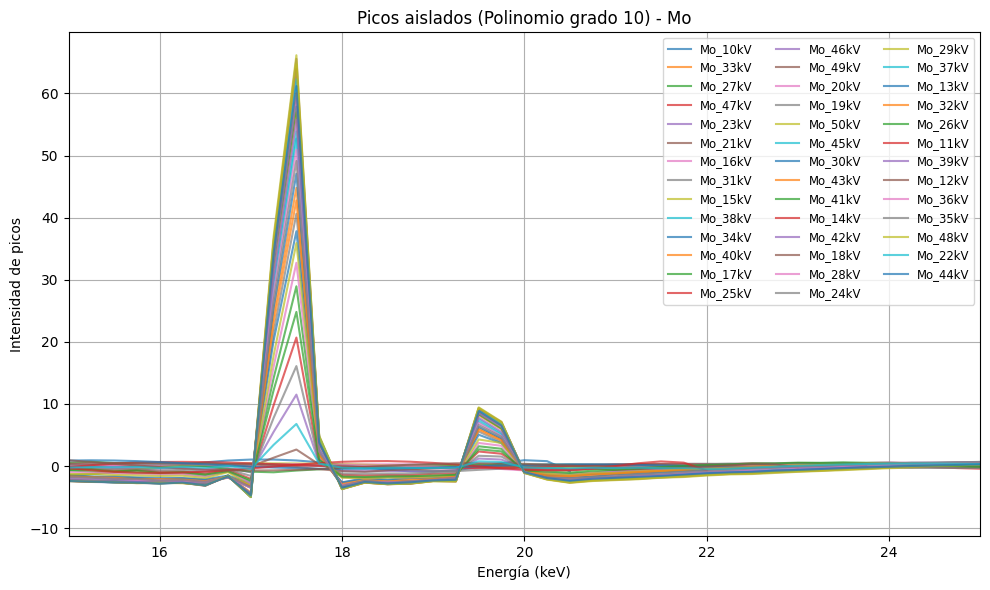

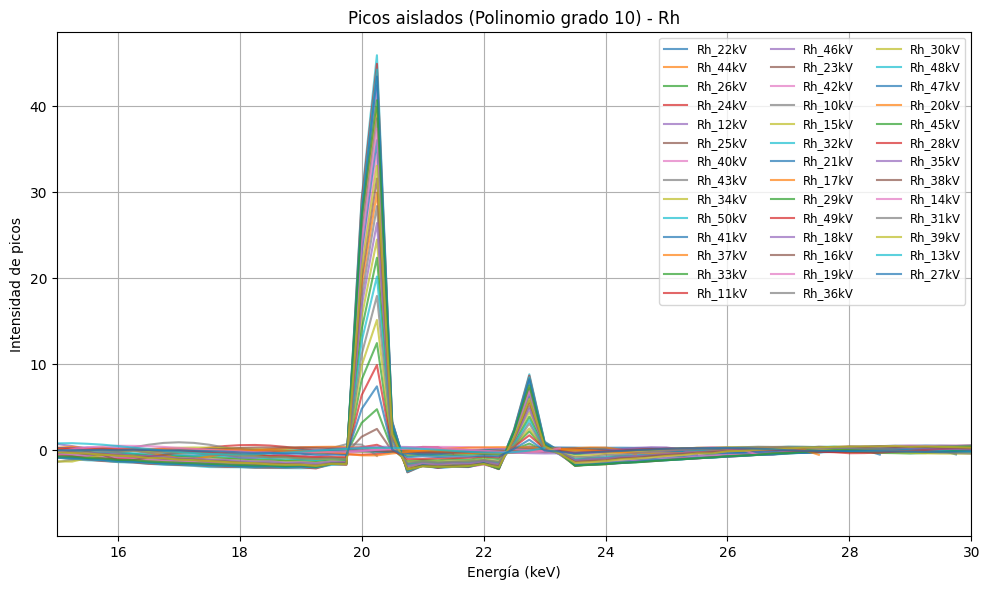

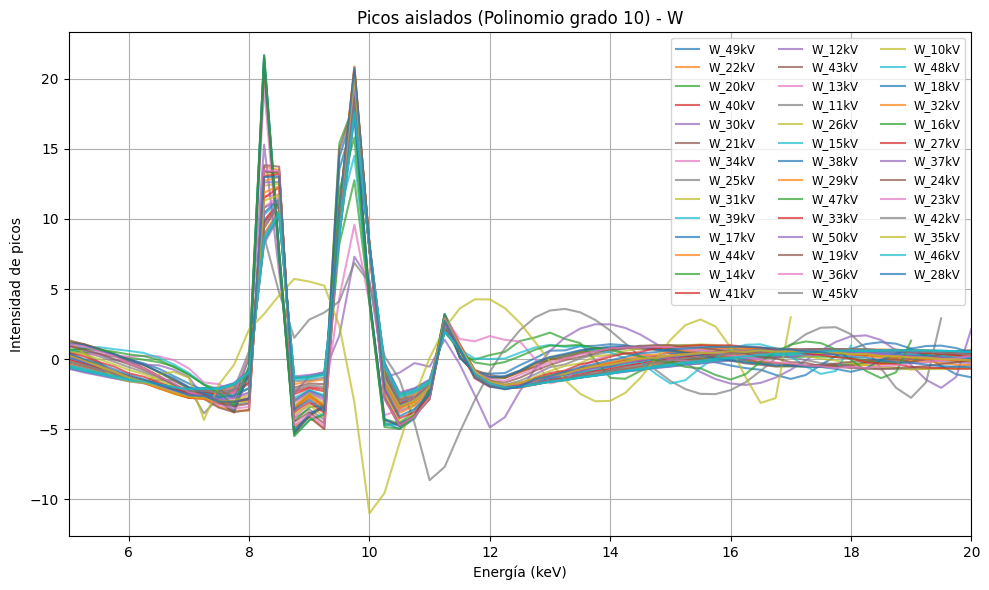

In [54]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

rangos_x = {
    "Mo": (15, 25),
    "Rh": (15, 30),
    "W":  (5, 20)
}

def graficar_picos_elemento_polinomio(elemento, grado=10):
    carpeta_elemento = os.path.join(extract_path, f"{elemento}_unfiltered_10kV-50kV")
    plt.figure(figsize=(10, 6))

    for archivo in glob.glob(os.path.join(carpeta_elemento, "*")):
        if archivo.endswith("_sin_picos.dat"):
            continue

        # espectro original
        datos_original = cargar_datos_seguro(archivo)
        if datos_original.size == 0:
            continue
        x = datos_original[:, 0]
        y = datos_original[:, 1]

        # espectro sin picos
        archivo_filtrado = archivo + "_sin_picos.dat"
        if not os.path.exists(archivo_filtrado):
            continue
        datos_filtrados = cargar_datos_seguro(archivo_filtrado)
        if datos_filtrados.size == 0:
            continue
        y_filtrado = datos_filtrados[:, 1]

        # ajuste polinómico del fondo
        coef = np.polyfit(x, y_filtrado, grado)
        fondo_polinomio = np.polyval(coef, x)

        # picos aislados
        y_picos = y - fondo_polinomio

        plt.plot(x, y_picos, alpha=0.7, label=os.path.basename(archivo).split(".")[0])

    plt.title(f"Picos aislados (Polinomio grado {grado}) - {elemento}")
    plt.xlabel("Energía (keV)")
    plt.ylabel("Intensidad de picos")
    plt.grid(True)

    if elemento in rangos_x:
        plt.xlim(*rangos_x[elemento])

    plt.legend(fontsize="small", ncol=3)
    plt.tight_layout()
    plt.savefig(f"3.b_{elemento}_polinomio.pdf")
    plt.show()

# Ejecutar para los tres elementos
graficar_picos_elemento_polinomio("Mo")
graficar_picos_elemento_polinomio("Rh")
graficar_picos_elemento_polinomio("W")

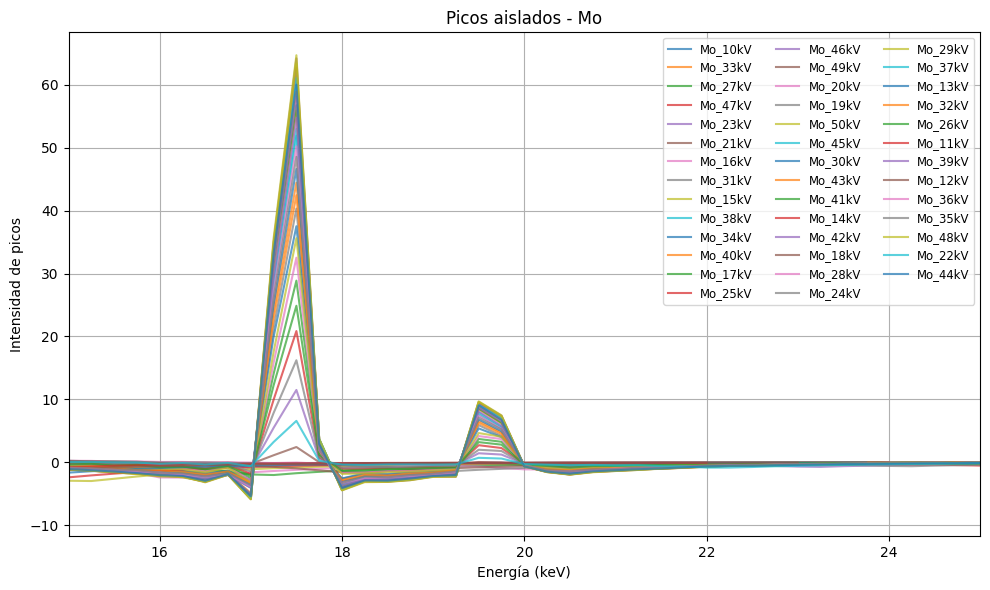

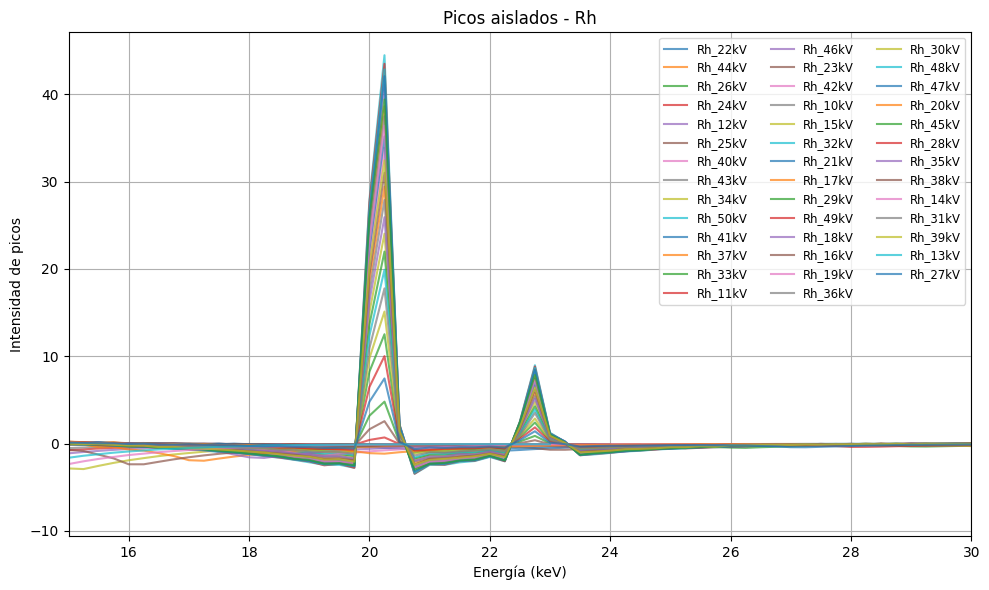

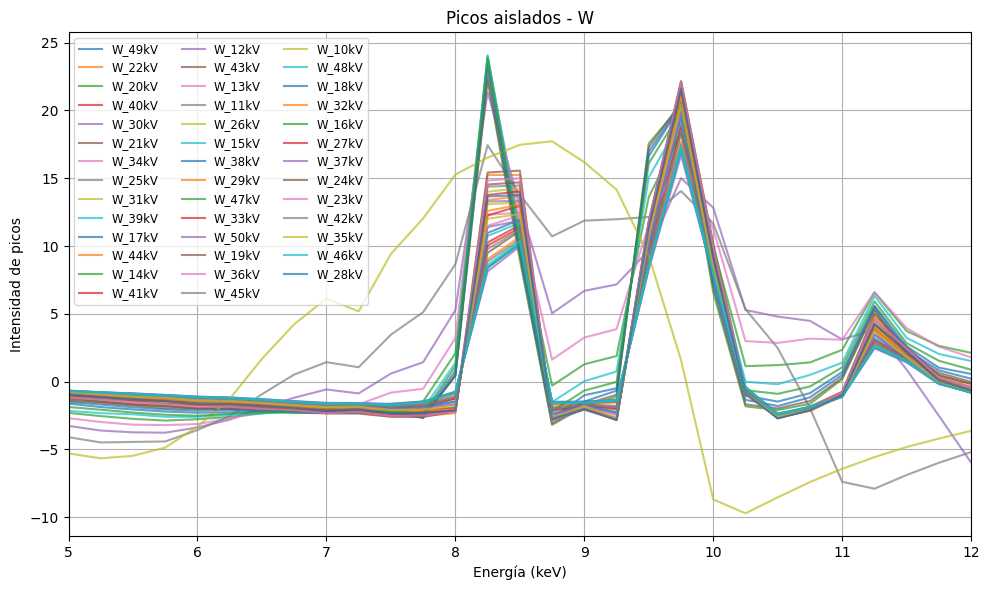

In [55]:
from scipy.interpolate import Rbf

rangos_x = {
    "Mo": (15, 25),
    "Rh": (15, 30),
    "W":  (5, 12)
}

def graficar_picos_elemento(elemento, smooth_factor=100, rbf_function="multiquadric"):
    carpeta_elemento = os.path.join(extract_path, f"{elemento}_unfiltered_10kV-50kV")
    plt.figure(figsize=(10, 6))

    for archivo in glob.glob(os.path.join(carpeta_elemento, "*")):
        if archivo.endswith("_sin_picos.dat"):
            continue

        #espectro original
        datos_original = cargar_datos_seguro(archivo)
        if datos_original.size == 0:
            continue
        x = datos_original[:, 0]
        y = datos_original[:, 1]

        #espectro sin picos
        archivo_filtrado = archivo + "_sin_picos.dat"
        if not os.path.exists(archivo_filtrado):
            continue
        datos_filtrados = cargar_datos_seguro(archivo_filtrado)
        if datos_filtrados.size == 0:
            continue
        y_filtrado = datos_filtrados[:, 1]

        rbf = Rbf(x, y_filtrado, function=rbf_function, smooth=smooth_factor)

        y_picos = y - rbf(x)

        plt.plot(x, y_picos, alpha=0.7, label=os.path.basename(archivo).split(".")[0])

    plt.title(f"Picos aislados - {elemento}")
    plt.xlabel("Energía (keV)")
    plt.ylabel("Intensidad de picos")
    plt.grid(True)

    if elemento in rangos_x:
        plt.xlim(*rangos_x[elemento])

    plt.legend(fontsize="small", ncol=3)
    plt.tight_layout()
    plt.savefig(f"3.a_{elemento}.pdf")
    plt.show()

graficar_picos_elemento("Mo")
graficar_picos_elemento("Rh")
graficar_picos_elemento("W")

/tmp/ipython-input-3465622864.py:26: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(gaussiana, x_pico, y_pico,


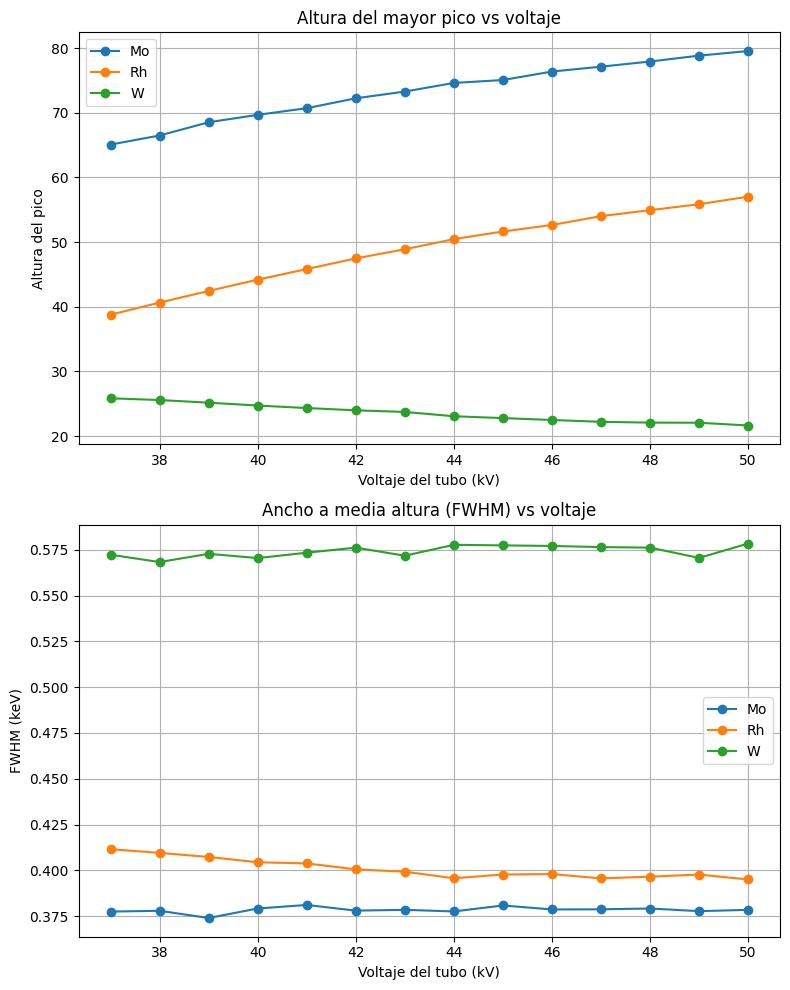

Gráfica guardada como 3.b.pdf


In [56]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

def gaussiana(x, A, x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def ajustar_mayor_pico(x, y):
    picos, _ = find_peaks(y, prominence=0.05)
    if len(picos) == 0:
        return None

    indice_pico = picos[np.argmax(y[picos])]
    x0_aprox = x[indice_pico]
    A_aprox = y[indice_pico]
    sigma_aprox = 0.2

    ventana = (x > x0_aprox - 0.5) & (x < x0_aprox + 0.5)
    x_pico = x[ventana]
    y_pico = y[ventana]

    try:
        popt, _ = curve_fit(gaussiana, x_pico, y_pico,
                            p0=[A_aprox, x0_aprox, sigma_aprox])
    except RuntimeError:
        return None

    A_fit, x0_fit, sigma_fit = popt
    fwhm = 2.3548 * abs(sigma_fit)  # Ancho a media altura
    return A_fit, x0_fit, fwhm

carpeta = "mammography_spectra"
elementos = ["Mo", "Rh", "W"]

resultados = {elem: {"voltaje": [], "altura": [], "fwhm": []} for elem in elementos}

for elem in elementos:
    carpeta_elem = os.path.join(carpeta, f"{elem}_unfiltered_10kV-50kV")
    archivos = sorted(glob.glob(os.path.join(carpeta_elem, "*.dat")))

    for archivo in archivos:
        nombre = os.path.basename(archivo)
        try:
            voltaje = int(nombre.split("_")[-1].replace("kV.dat", ""))
        except ValueError:
            continue

        datos = cargar_datos_seguro(archivo, skiprows=1)
        if datos.size == 0:
            continue

        x = datos[:, 0]
        y = datos[:, 1]

        ajuste = ajustar_mayor_pico(x, y)
        if ajuste is None:
            continue

        A_fit, x0_fit, fwhm = ajuste
        resultados[elem]["voltaje"].append(voltaje)
        resultados[elem]["altura"].append(A_fit)
        resultados[elem]["fwhm"].append(fwhm)

fig, axs = plt.subplots(2, 1, figsize=(8, 10))

for elem in elementos:
    axs[0].plot(resultados[elem]["voltaje"][27:], resultados[elem]["altura"][27:],
                marker='o', label=elem)
axs[0].set_xlabel("Voltaje del tubo (kV)")
axs[0].set_ylabel("Altura del pico")
axs[0].set_title("Altura del mayor pico vs voltaje")
axs[0].legend()
axs[0].grid(True)

for elem in elementos:
    axs[1].plot(resultados[elem]["voltaje"][27:], resultados[elem]["fwhm"][27:],
                marker='o', label=elem)
axs[1].set_xlabel("Voltaje del tubo (kV)")
axs[1].set_ylabel("FWHM (keV)")
axs[1].set_title("Ancho a media altura (FWHM) vs voltaje")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.savefig("3.b.pdf")
plt.show()
print("Gráfica guardada como 3.b.pdf")